This code addresses [Issue #16](https://github.com/pavelkomarov/spectral-derivatives/issues/16).

Essentially, `spec_deriv`, `math.pdf`, [Trefethen himself](https://epubs.siam.org/doi/epdf/10.1137/1.9780898719598.ch8) are overcomplicating taking derivatives with the Chebyshev basis, and we can obviate a lot of steps.

0 1.8943169251165753e-31
1 8.94701430513043e-20 8.947105944109962e-20
2 1.9393758979767717e-15 1.939376314193781e-15
3 3.098259043458608e-11 3.0982608279545416e-11
4 1.952974931558365e-07 1.9529787279761553e-07


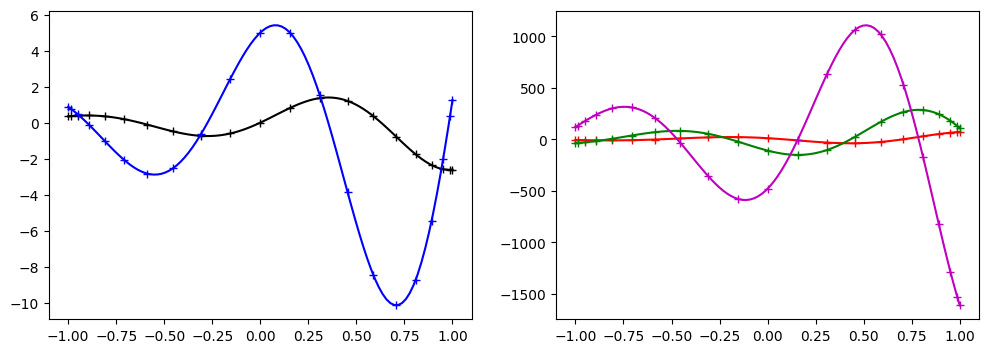

In [6]:
import numpy as np
from numpy.polynomial.chebyshev import Chebyshev
from matplotlib import pyplot
from scipy.fft import dct
from specderiv import cheb_deriv

N = 20

x_n = np.cos(np.arange(N+1) * np.pi / N)
x = np.linspace(-1, 1, 100)

y = lambda x: np.exp(x) * np.sin(5*x)
dy = lambda x: 5*np.exp(x) * np.cos(5*x) + np.exp(x) * np.sin(5*x)
d2y = lambda x: 2*np.exp(x) * (5*np.cos(5*x) - 12*np.sin(5*x))
d3y = lambda x: -2*np.exp(x) * (37*np.sin(5*x) + 55*np.cos(5*x))
d4y = lambda x: 4*np.exp(x) * (119*np.sin(5*x) - 120*np.cos(5*x))

y_n = y(x_n)
Y_k = dct(y_n, 1)
Y_k[0] /= 2; Y_k[N] /= 2 # because first and last coefficients are outside the sum
cheb = Chebyshev(Y_k/N) # This class' deriv function works in O(N)
# No mapping back to chebyshev domain. No worrying about endpoint formulas.
# No inverse transforms. It's super simple.

cheb_1 = cheb.deriv(1) # O(nu * N) instead of O(N + nu^2 + nu * N + N log N)
cheb_2 = cheb.deriv(2)
cheb_3 = cheb.deriv(3)
cheb_4 = cheb.deriv(4)

print("0", np.mean((y_n - cheb(x_n))**2))
print("1", np.mean((dy(x_n) - cheb_1(x_n))**2), np.mean((dy(x_n) - cheb_deriv(y_n, x_n, 1))**2))
print("2", np.mean((d2y(x_n) - cheb_2(x_n))**2), np.mean((d2y(x_n) - cheb_deriv(y_n, x_n, 2))**2))
print("3", np.mean((d3y(x_n) - cheb_3(x_n))**2), np.mean((d3y(x_n) - cheb_deriv(y_n, x_n, 3))**2))
print("4", np.mean((d4y(x_n) - cheb_4(x_n))**2), np.mean((d4y(x_n) - cheb_deriv(y_n, x_n, 4))**2))

fig, axes = pyplot.subplots(1, 2, figsize=(12,4))
axes[0].plot(x, y(x), 'k')
axes[0].plot(x_n, cheb(x_n), 'k+')
axes[0].plot(x, dy(x), 'b')
axes[0].plot(x_n, cheb_1(x_n), 'b+')
axes[1].plot(x, d2y(x), 'r')
axes[1].plot(x_n, cheb_2(x_n), 'r+')
axes[1].plot(x, d3y(x), 'g')
axes[1].plot(x_n, cheb_3(x_n), 'g+')
axes[1].plot(x, d4y(x), 'm')
axes[1].plot(x_n, cheb_4(x_n), 'm+');